# Dog Breed Classification with Convolutional Neural Networks

## Introduction

In this project, we aim to classify dog breeds using Convolutional Neural Networks (CNNs). We will leverage the Stanford Dogs Dataset, a comprehensive collection of dog images spanning various breeds. Our goal is to build a deep learning model that can accurately identify the breed of a dog from an input image.

### Team

- Josh Canode
- Aaron Galicia
- Gabriel Aracena

## Data Preparation

1. **Data Collection:** We obtain the Stanford Dogs Dataset, which contains images of various dog breeds. This dataset is publicly available on Kaggle.

2. **Data Split:** We split the dataset into three subsets: training, validation, and test data. Typically, we allocate 70% of the data for training, 15% for validation, and 15% for testing. This ensures that our model learns from a diverse set of examples and can generalize well.

3. **Reduing the Classes** Because of the limited size of the dataset, we decided that to achieve more accurate results, we would need to reduce the number of breeds in our data. To do this, we took two approaches. Initially, we selected the 30 breeds with the most images to narrow down the scope of the project and simplify computational complexity. However, we noticed that many different dog breeds looked extremely similar and were challenging to recognize even for humans. As a result, we specifically chose dog breeds that we considered to be the most unique.

3. **Data Augmentation:** To improve the model's robustness, we apply data augmentation techniques such as rotation, flipping, and zooming to the training dataset. This helps the model handle variations in dog pose and orientation.

4. **Normalization:** We normalize the pixel values of the images to a range between 0 and 1. This step ensures that the model trains more efficiently.

## Convolutional Neural Network (CNN) Architecture

Our CNN architecture is designed to effectively learn and classify dog breeds. It consists of several key components:

1. **Input Layer:** The input layer accepts images with dimensions of 256x256 pixels and three color channels (RGB).

2. **Convolutional Layers:** We use multiple convolutional layers to extract hierarchical features from the input images. Each layer is followed by batch normalization and max-pooling to enhance feature extraction and reduce spatial dimensions.

3. **Global Average Pooling:** Instead of traditional flattening, we use global average pooling to reduce the spatial dimensions of the feature maps and retain important information. This helps reduce the number of parameters and prevents overfitting.

4. **Dense Layers:** Our dense layers act as a classifier. We have two dense layers with dropout to prevent overfitting. The final dense layer has 20 units, corresponding to the number of dog breeds in our dataset.

5. **Output Layer:** The output layer uses the softmax activation function to provide probability scores for each dog breed. The breed with the highest probability is our model's prediction.

## Training the CNN

We train our CNN using the training dataset with the following steps:

1. **Forward Propagation:** We forward propagate the training data through the network to generate predictions.

2. **Cost Function:** We use categorical cross-entropy as our cost function to measure the dissimilarity between predicted and actual labels.

3. **Backpropagation:** Backpropagation computes gradients with respect to the model's parameters, allowing us to update weights and biases through optimization techniques.

4. **Optimization:** We use the Adam optimizer with a learning rate of 0.001 to minimize the cost function.

5. **Training Epochs:** We train the model for 50 epochs, adjusting the learning rate if needed.

## Model Evaluation

After training, we evaluate our model using the validation dataset to assess its performance:

1. **Validation Loss and Accuracy:** We monitor the validation loss and accuracy to determine if the model is learning and generalizing correctly.

2. **Early Stopping:** We employ early stopping with a patience of 10 epochs to prevent overfitting and restore the best model weights.

## Model Prediction and Interpretation

Once our model is trained and validated, we apply it to the test dataset to predict the dog breeds. We use a threshold function to convert continuous probability scores into distinct class labels (dog breeds). We then assess the model's accuracy on the test dataset.

## Conclusion

In this project, we have built a Convolutional Neural Network (CNN) to classify dog breeds using the Stanford Dogs Dataset. Our model demonstrates the capability to identify the breed of a dog from an input image with a high degree of accuracy. Keep in mind that this "optimal" classification is based solely on the data and criteria used in this project. Real-world scenarios may involve additional factors such as team chemistry and player form that go beyond the scope of this model.

![Sample Dog Classification](sample_dog_classification.png)

## Acknowledgments

We would like to acknowledge the Stanford Dogs Dataset and Kaggle for providing the dataset and resources necessary for this project.


In [22]:
import pathlib
import tensorflow as tf
'''
dataset_url = "https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')
'''

'\ndataset_url = "https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset"\narchive = tf.keras.utils.get_file(origin=dataset_url, extract=True)\ndata_dir = pathlib.Path(archive).with_suffix(\'\')\n'

## Split Folders ##
### Creating testing and Training data sets.

In [3]:
import splitfolders

splitfolders.ratio('./archive/images/Images2', output="./dogs_split_data", ratio=(0.7, 0.15, 0.15))

Copying files: 0 files [00:00, ? files/s]

Copying files: 3725 files [00:02, 1394.40 files/s]


# Model process #

## Import libraries and load the dataset ##

In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from PIL import Image

# This Code Needs to be Updated when Input Size is Changed 

# Set the path to the dataset folder
data_path = "./dogs_split_data"

# Create data generators for training and test
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(data_path, "train"),
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_path, "val"),
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)  

# Test the model on a few samples
test_generator = val_datagen.flow_from_directory(
    os.path.join(data_path, "test"),
    target_size=(256, 256),
    batch_size=1,
    class_mode='categorical', 
    shuffle=False
)

Found 2599 images belonging to 20 classes.
Found 547 images belonging to 20 classes.
Found 579 images belonging to 20 classes.


## Load the datasets and display sample images ##


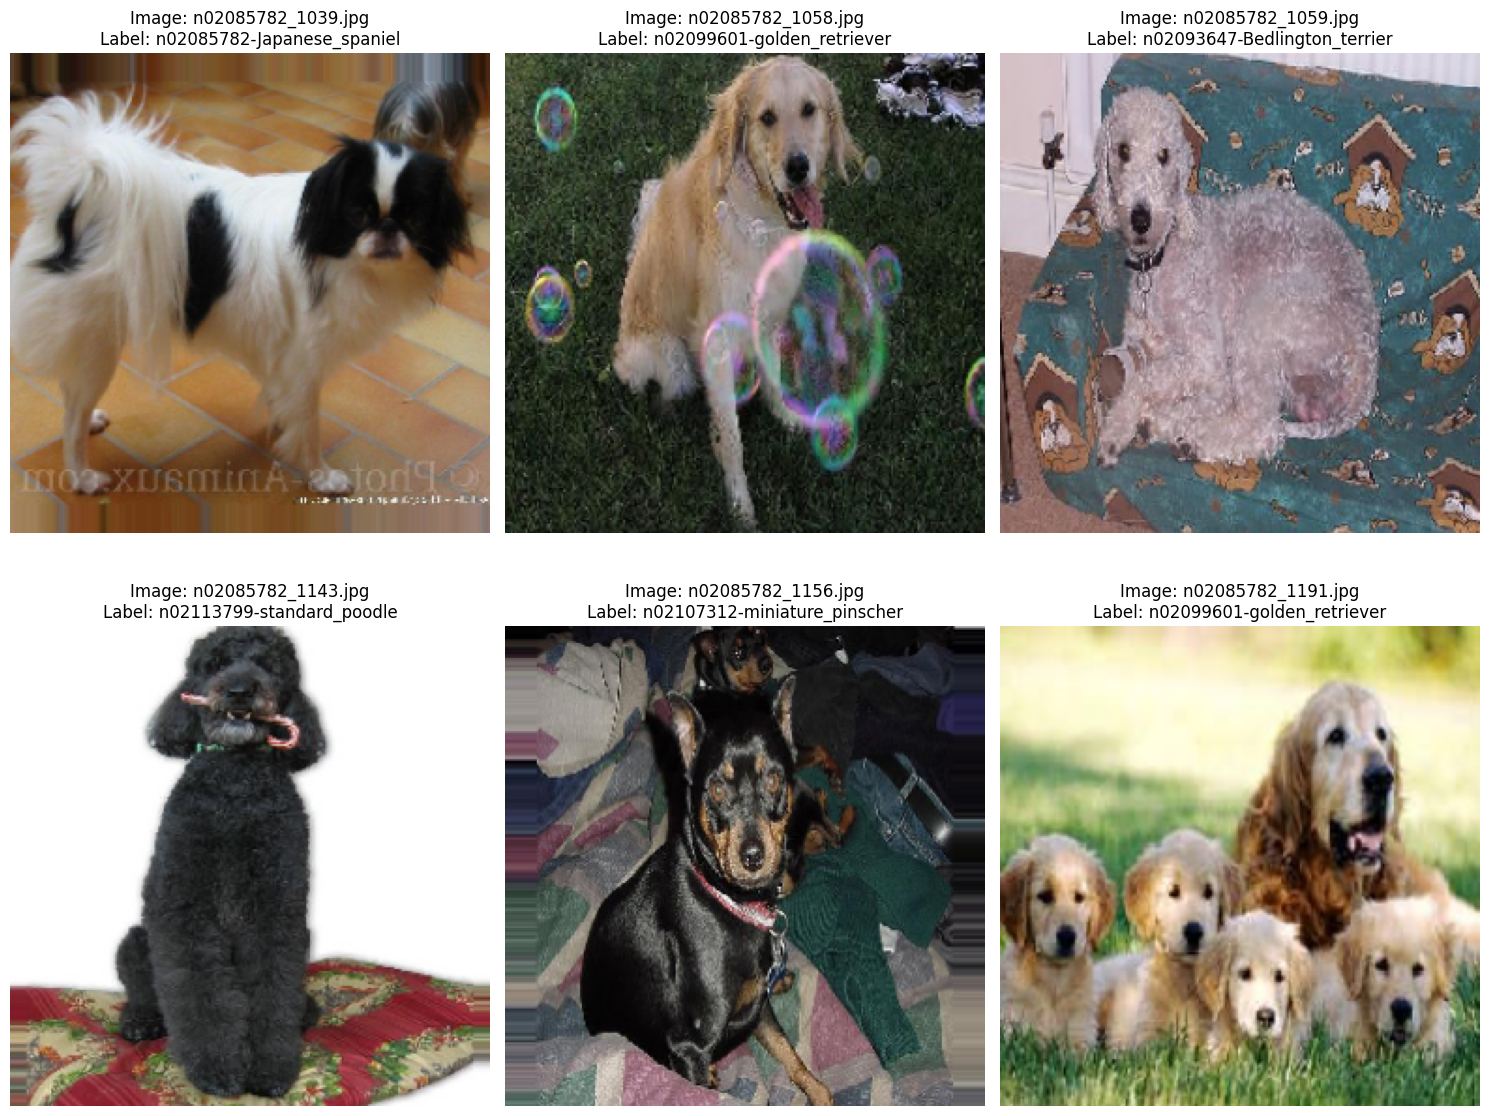

In [5]:
# Get the class indices mapping (class labels to class names)
class_indices = train_generator.class_indices

# Display 6 sample images from the training set along with their filenames and training labels
plt.figure(figsize=(15, 12))
for i in range(6):
    img, label = train_generator.next()
    img_filename = train_generator.filenames[train_generator.batch_index - 1]  # Get the filename of the current image
    img_class = list(class_indices.keys())[list(class_indices.values()).index(label[0].argmax())]  # Get the class name
    plt.subplot(2, 3, i + 1)
    plt.imshow(img[0])
    plt.title(f"Image: {os.path.basename(img_filename)}\nLabel: {img_class}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Check if GPU Acceleration is Available ##

In [8]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    tf.config.experimental.set_visible_devices(gpu_devices[0], 'GPU')

Num GPUs Available:  0


### Step 3: Build the CNN model ###

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2

model = Sequential()

# Convolutional layers with added L2 regularization and increased depth
model.add(Conv2D(32, (3, 3), activation="relu", kernel_regularizer=l2(0.001), input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu", kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation="relu", kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation="relu", kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), activation="relu", kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Using Global Average Pooling instead of Flatten
model.add(GlobalAveragePooling2D())

# Dense layers with added L2 regularization and adjusted units
model.add(Dense(units=512, activation="relu", kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

model.add(Dense(units=256, activation="relu", kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

# Correcting the number of classes to 30
model.add(Dense(units=20, activation="softmax"))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

callbacks_list = [reduce_lr, early_stop, checkpoint]



In [12]:
history = model.fit(train_generator, validation_data=val_generator, epochs=100, batch_size=32, callbacks=callbacks_list)


Epoch 1/100
82/82 [==============================] - 171s 2s/step - loss: 4.6941 - accuracy: 0.0858 - val_loss: 4.9906 - val_accuracy: 0.0530 - lr: 0.0010
Epoch 2/100
82/82 [==============================] - 169s 2s/step - loss: 4.3185 - accuracy: 0.1216 - val_loss: 4.5741 - val_accuracy: 0.0676 - lr: 0.0010
Epoch 3/100
82/82 [==============================] - 173s 2s/step - loss: 4.1744 - accuracy: 0.1147 - val_loss: 4.8471 - val_accuracy: 0.0695 - lr: 0.0010
Epoch 4/100
82/82 [==============================] - 167s 2s/step - loss: 3.9979 - accuracy: 0.1331 - val_loss: 4.5318 - val_accuracy: 0.0731 - lr: 0.0010
Epoch 5/100
82/82 [==============================] - 162s 2s/step - loss: 3.8127 - accuracy: 0.1458 - val_loss: 3.9121 - val_accuracy: 0.0932 - lr: 0.0010
Epoch 6/100
82/82 [==============================] - 163s 2s/step - loss: 3.6508 - accuracy: 0.1508 - val_loss: 3.6889 - val_accuracy: 0.1481 - lr: 0.0010
Epoch 7/100
82/82 [==============================] - 169s 2s/step - lo

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_10 (Ba  (None, 254, 254, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_11 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                      

## Training Progress

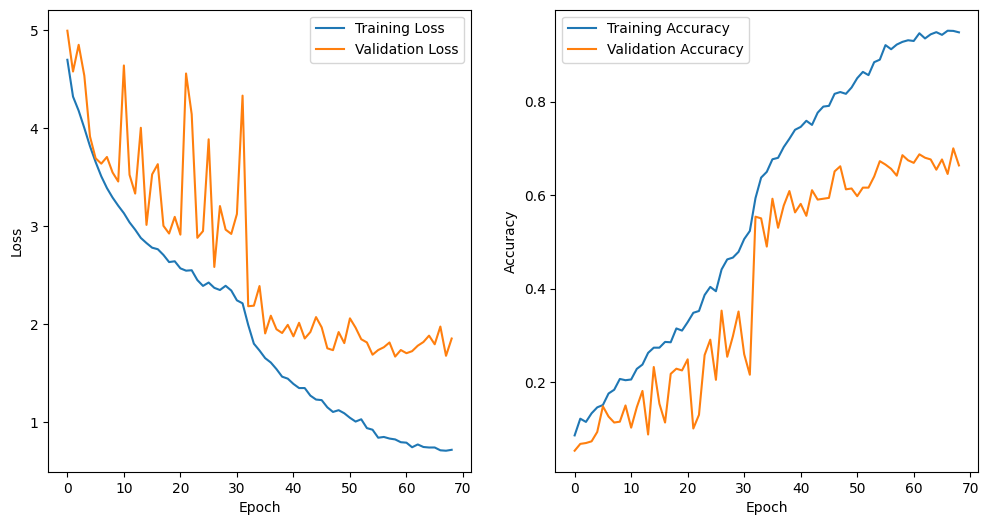

In [15]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


## Test Model ##

579/579 [==============================] - 14s 24ms/step


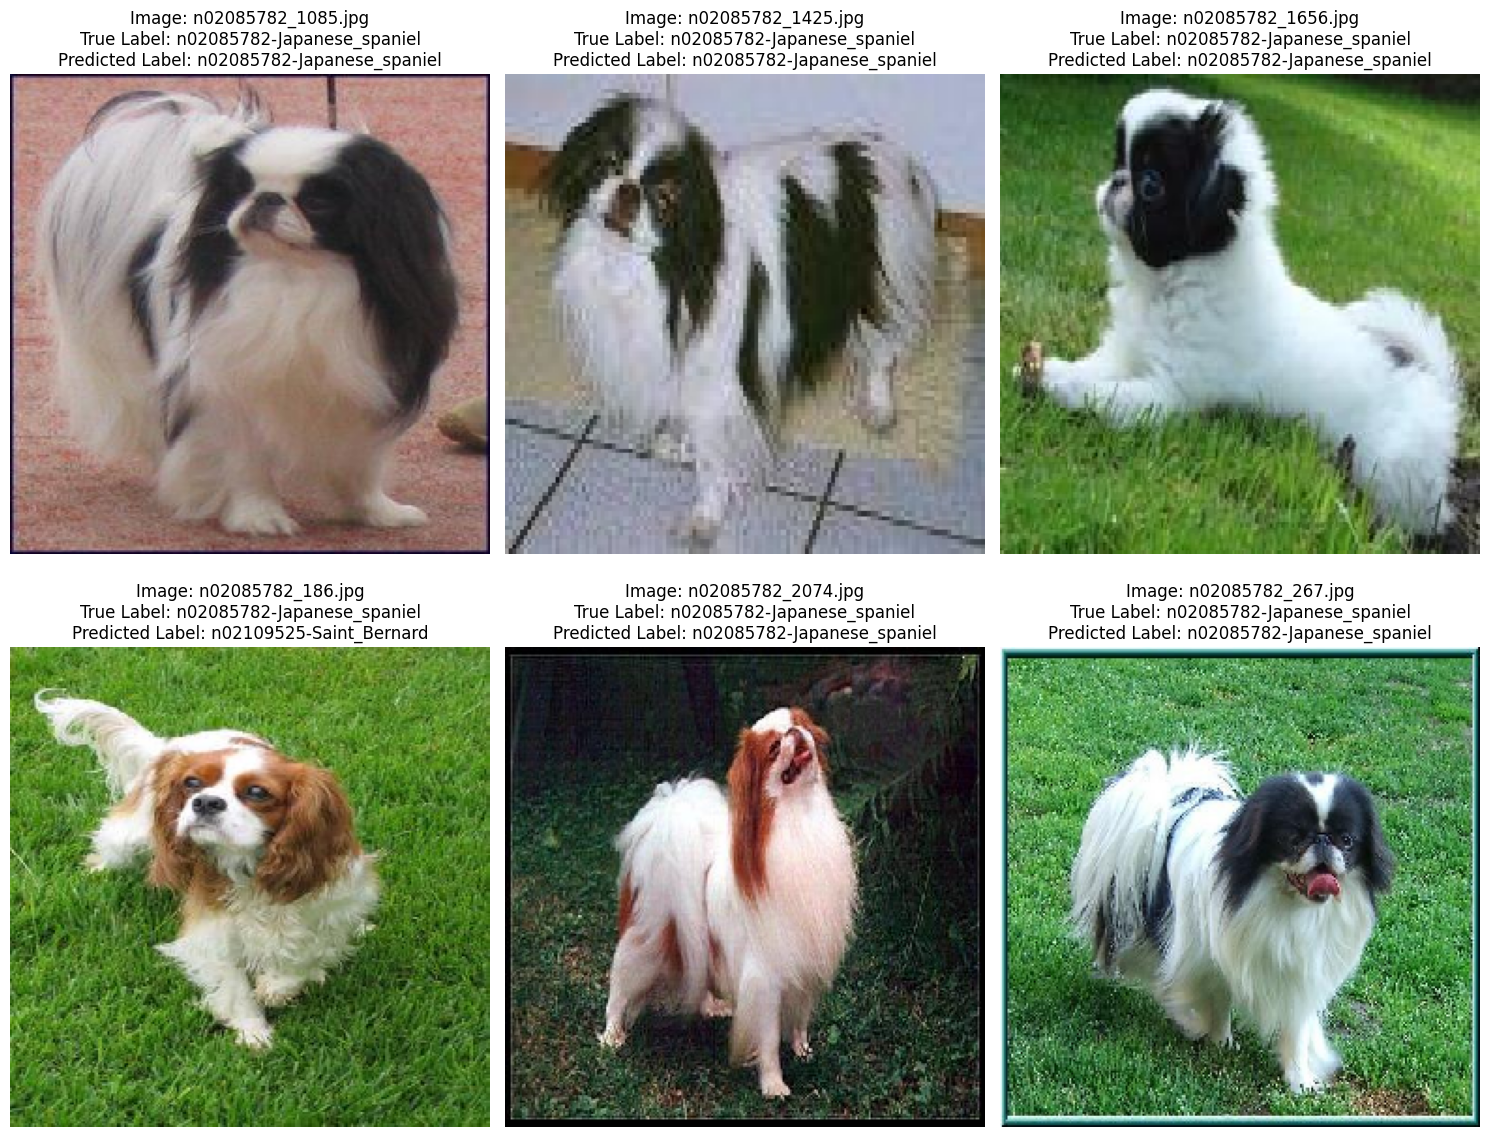

In [16]:
# Predict on the test set
predictions = model.predict(test_generator)

# Display some sample images from the test set along with their true and predicted labels
plt.figure(figsize=(15, 12))
for i in range(6):
    img, true_label = test_generator.next()
    img_filename = test_generator.filenames[test_generator.batch_index - 1]  # Get the filename of the current image
    true_class = list(test_generator.class_indices.keys())[list(test_generator.class_indices.values()).index(true_label.argmax())]  # Get the true class name
    predicted_class = list(test_generator.class_indices.keys())[list(test_generator.class_indices.values()).index(predictions[i].argmax())]  # Get the predicted class name

    plt.subplot(2, 3, i + 1)
    plt.imshow(img[0])
    plt.title(f"Image: {os.path.basename(img_filename)}\nTrue Label: {true_class}\nPredicted Label: {predicted_class}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Evaluate on Test set ##

In [21]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

579/579 [==============================] - 12s 21ms/step - loss: 1.7444 - accuracy: 0.6701
Test Loss: 1.7444
Test Accuracy: 0.6701


After loading trained model and the best weights using load_weights, we use evaluate to obtain the test loss and accuracy. These values are printed to the console. The evaluation results show that the prediction accuracy is around 67%

## Testing Using Online Image ##



1/1 [==============================] - 0s 33ms/step


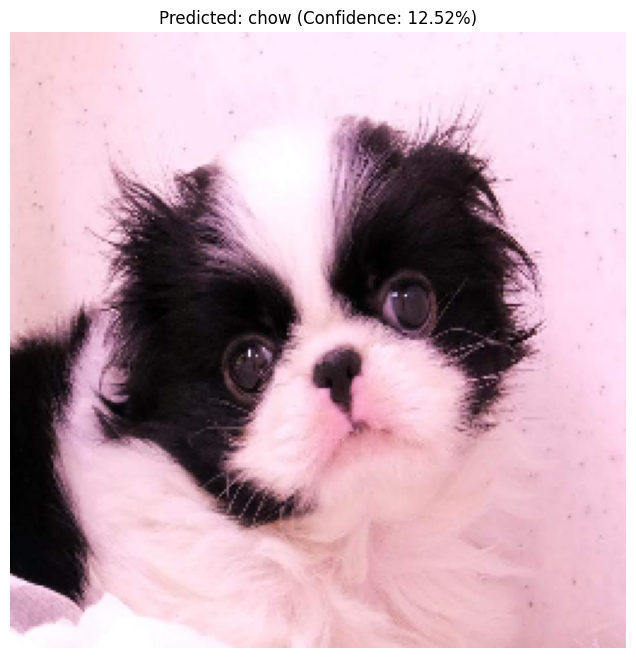

In [20]:
from keras.models import load_model
import tensorflow as tf

img_height=256
img_width=256

# Load the best model saved during training
model = load_model("./best_model.h5")

# Direct link to the image file
img_url = "https://upload.wikimedia.org/wikipedia/commons/3/38/Japanese_ChinJapanese_Spaniel.jpg"
# Download the image and get the local path
img_path = tf.keras.utils.get_file('jap.jpg', origin=img_url)

img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)

# Now, you can pass this 'image' to the model for prediction:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

class_names = ['Japanese_spaniel', 'Maltese_dog', 'Afghan_hound', 'beagle', 'bloodhound', 'Irish_wolfhound', 'Bedlington_terrier', 'Norwich_terrier', 'Airedale', 'golden_retriever', 'Irish_water_spaniel', 'Rottweiler', 'miniature_pinscher', 'Bernese_mountain_dog', 'French_bulldog', 'Saint_Bernard', 'Siberian_husky', 'chow', 'standard_poodle', 'dhole']

# Display the image with the predicted class and confidence
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title(
    "Predicted: {} (Confidence: {:.2f}%)".format(class_names[np.argmax(score)], 100 * np.max(score))
)
plt.show()

### Testing using image from the dataset

1/1 [==============================] - 0s 128ms/step


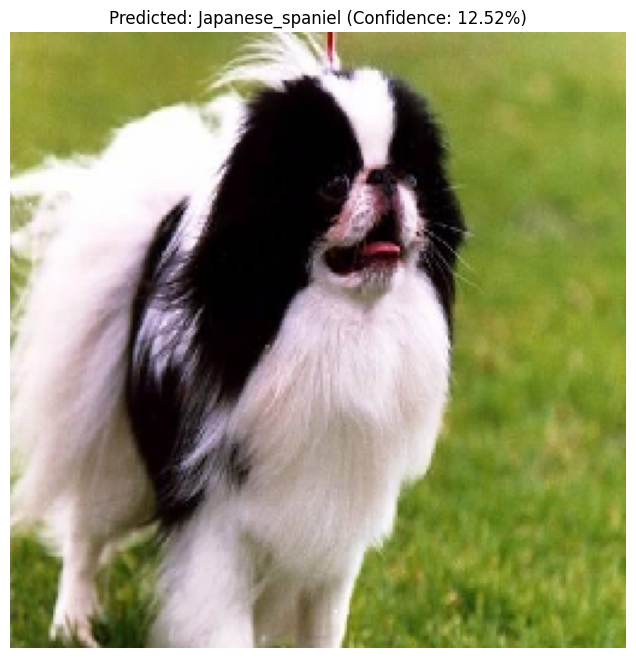

In [19]:
import numpy as np
import tensorflow as tf
from keras.models import load_model

img_height = 256
img_width = 256

# Load the best model saved during training
model = load_model("./best_model.h5")

# Load and preprocess the image
image_path = "./archive/images/Images2/n02085782-Japanese_spaniel/n02085782_1039.jpg"
img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

class_names = ['Japanese_spaniel', 'Maltese_dog', 'Afghan_hound', 'beagle', 'bloodhound', 'Irish_wolfhound', 'Bedlington_terrier', 'Norwich_terrier', 'Airedale', 'golden_retriever', 'Irish_water_spaniel', 'Rottweiler', 'miniature_pinscher', 'Bernese_mountain_dog', 'French_bulldog', 'Saint_Bernard', 'Siberian_husky', 'chow', 'standard_poodle', 'dhole']

# Display the image with the predicted class and confidence
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title(
    "Predicted: {} (Confidence: {:.2f}%)".format(class_names[np.argmax(score)], 100 * np.max(score))
)
plt.show()

## Get Classification Names ##
This is for updating the classification names in case that the dataset is ever updated

In [4]:
import os

# Specify the directory containing the folders
directory_path = "./archive/images/Images2"

# Check if the directory exists
if not os.path.exists(directory_path):
    print(f"The directory '{directory_path}' does not exist.")
else:
    # List all items (files and folders) in the directory
    items = os.listdir(directory_path)

    # Filter only the folders (subdirectories)
    subdirectories = [item for item in items if os.path.isdir(os.path.join(directory_path, item))]

    # Extract and print the folder names
    for folder in subdirectories:
        folder_name = folder.split("-")[-1]
        print(f"'{folder_name}',")


'Japanese_spaniel',
'Maltese_dog',
'Afghan_hound',
'beagle',
'bloodhound',
'Irish_wolfhound',
'Bedlington_terrier',
'Norwich_terrier',
'Airedale',
'golden_retriever',
'Irish_water_spaniel',
'Rottweiler',
'miniature_pinscher',
'Bernese_mountain_dog',
'French_bulldog',
'Saint_Bernard',
'Siberian_husky',
'chow',
'standard_poodle',
'dhole',


# Conclusion #

In conclusion, our project presented several challenges that influenced our results and overall conclusions:

- We achieved an accuracy rate of 70 percent, which demonstrates a reasonable level of success given the difficulty of recognizing photos from the web accurately.

- One of the main challenges we encountered was the low confidence in our model's predictions. This low confidence is a result of the high similarity between different dog breeds, making it challenging for both our model and humans to distinguish between them.

- Additionally, our dataset had limited examples for each class, with only 20,580 pictures distributed across 120 classes, resulting in pictures per class being significantly low (around 166 pictures per class).

- Furthermore, our project faced high computation requirements, and unfortunately, we were unable to access the VR Lab to work on it, which limited our ability to experiment with more advanced techniques and larger datasets. Additionally, the absence of CUDA and GPU usage further constrained the speed and scale of our computations.

In light of these challenges, we acknowledge that there is room for improvement in terms of accuracy and model robustness. To enhance our model's performance, we could explore strategies such as transfer learning, data augmentation, and fine-tuning. Increasing the dataset size and ensuring a more balanced distribution of images across classes could also contribute to better results.

In summary, while we achieved a 70 percent accuracy rate, we recognize the difficulties inherent in accurately classifying dog breeds due to similarities between them, limited data, and computational constraints. Future work in this area should focus on addressing these challenges to enhance the model's performance and accuracy. Finally, we also wanted to highlight that this 70% accuracy rate achieved was not achieved with ease and it was very challenging. We spent countless hours trying different models and training strategies and due to technical limitations this was the best that we have accomplished. Also wanted to highlight that this rate was accomplished when tested with 20 breeds of dogs.
